In [72]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [73]:
import os
import pandas as pd
import io
from google.colab import files
 
 
uploaded = files.upload()

Saving Product_details - Copy.csv to Product_details - Copy (2).csv


In [74]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded[r'Product_details - Copy.csv']))
print(df)

      Text_ID                                Product_Description  \
0        3057  The Web DesignerÛªs Guide to iOS (and Android...   
1        6254  RT @mention Line for iPad 2 is longer today th...   
2        8212  Crazy that Apple is opening a temporary store ...   
3        4422  The lesson from Google One Pass: In this digit...   
4        5526  RT @mention At the panel: &quot;Your mom has a...   
...       ...                                                ...   
6359     2945  Thanks @mention for hosting this event #sxsw #...   
6360     4528  SXSW iPhone app is awesome, but iPad app crash...   
6361     6526  RT @mention RT @mention Download 20+ free trac...   
6362     2110  OH at Texas Social Media Awards: 'You don't ne...   
6363     2177  #Google launching a &quot;major&quot; new soci...   

      Product_Type  Sentiment  
0                9          2  
1                9          2  
2                9          2  
3                9          2  
4                9     

In [75]:

display(df.head(10))

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
5,6064,RT @mention I think my effing hubby is in line...,6,1
6,7713,&quot;Android users are not iPhone users. (The...,9,2
7,2975,Wow! RT@mention We interrupt your regularly sc...,9,3
8,818,Google to Launch New Social Network Called Cir...,9,2
9,1318,@mention Welcome! Enjoy #Sxsw and ride anywhe...,9,2


In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB
None


In [77]:
sample_review = df["Product_Description"]
print(sample_review)

0       The Web DesignerÛªs Guide to iOS (and Android...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6364, dtype: object


In [78]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

0       The Web DesignerÛªs Guide to iOS (and Android...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6364, dtype: object


In [79]:
pattern = r"\&\#[0-9]+\;"

df["preprocessed"] = df["Product_Description"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"])

0       The Web DesignerÛªs Guide to iOS (and Android...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: preprocessed, Length: 6364, dtype: object


In [80]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [81]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


0       The Web DesignerÛªs Guide to iOS and Android ...
1       RT @ mention Line for iPad 2 be long today tha...
2       Crazy that Apple be open a temporary store in ...
3       The lesson from Google One Pass : In this digi...
4       RT @ mention At the panel : & quot ; Your mom ...
                              ...                        
6359    Thanks @ mention for host this event # sxsw # ...
6360    SXSW iPhone app be awesome but iPad app crash ...
6361    RT @ mention RT @ mention Download 20+ free tr...
6362    OH at Texas Social Media Awards : You don t ne...
6363    # Google launch a & quot ; major & quot ; new ...
Name: preprocessed, Length: 6364, dtype: object
CPU times: user 10.2 s, sys: 183 ms, total: 10.4 s
Wall time: 11 s


In [82]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"])

0       The Web DesignerUas Guide to iOS and Android A...
1       RT @ mention Line for iPad 2 be long today tha...
2       Crazy that Apple be open a temporary store in ...
3       The lesson from Google One Pass : In this digi...
4       RT @ mention At the panel : & quot ; Your mom ...
                              ...                        
6359    Thanks @ mention for host this event # sxsw # ...
6360    SXSW iPhone app be awesome but iPad app crash ...
6361    RT @ mention RT @ mention Download 20+ free tr...
6362    OH at Texas Social Media Awards : You don t ne...
6363    # Google launch a & quot ; major & quot ; new ...
Name: preprocessed, Length: 6364, dtype: object


In [83]:
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"])

0       The Web DesignerUas Guide to iOS and Android A...
1       RT   mention Line for iPad 2 be long today tha...
2       Crazy that Apple be open a temporary store in ...
3       The lesson from Google One Pass   In this digi...
4       RT   mention At the panel     quot   Your mom ...
                              ...                        
6359    Thanks   mention for host this event   sxsw   ...
6360    SXSW iPhone app be awesome but iPad app crash ...
6361    RT   mention RT   mention Download 20  free tr...
6362    OH at Texas Social Media Awards   You don t ne...
6363      Google launch a   quot   major   quot   new ...
Name: preprocessed, Length: 6364, dtype: object


In [84]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"])

0       the web designeruas guide to ios and android a...
1       rt   mention line for ipad 2 be long today tha...
2       crazy that apple be open a temporary store in ...
3       the lesson from google one pass   in this digi...
4       rt   mention at the panel     quot   your mom ...
                              ...                        
6359    thanks   mention for host this event   sxsw   ...
6360    sxsw iphone app be awesome but ipad app crash ...
6361    rt   mention rt   mention download 20  free tr...
6362    oh at texas social media awards   you don t ne...
6363      google launch a   quot   major   quot   new ...
Name: preprocessed, Length: 6364, dtype: object


In [85]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

0       web designeruas guide ios android apps today  ...
1       rt   mention line ipad 2 long today yesterday ...
2       crazy apple open temporary store austin tomorr...
3       lesson google one pass   digital environment u...
4       rt   mention panel     quot   mom ipad design ...
                              ...                        
6359    thanks   mention host event   sxsw   sxswi   i...
6360    sxsw iphone app awesome ipad app crash every t...
6361    rt   mention rt   mention download 20  free tr...
6362    oh texas social media awards   need ask mother...
6363      google launch   quot   major   quot   new so...
Name: preprocessed, Length: 6364, dtype: object


In [86]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"])

0       web designeruas guide ios android apps today m...
1       rt mention line ipad 2 long today yesterday sx...
2       crazy apple open temporary store austin tomorr...
3       lesson google one pass digital environment use...
4       rt mention panel quot mom ipad design boomer q...
                              ...                        
6359    thanks mention host event sxsw sxswi iwantacr4...
6360    sxsw iphone app awesome ipad app crash every t...
6361    rt mention rt mention download 20 free track m...
6362    oh texas social media awards need ask mother a...
6363     google launch quot major quot new social netw...
Name: preprocessed, Length: 6364, dtype: object


In [87]:
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized)


[['web', 'designeruas', 'guide', 'ios', 'android', 'apps', 'today', 'mention', '10', 'link', 'sxsw'], ['rt', 'mention', 'line', 'ipad', '2', 'long', 'today', 'yesterday', 'sxsw', 'get', 'line', 'today', 'fun'], ['crazy', 'apple', 'open', 'temporary', 'store', 'austin', 'tomorrow', 'handle', 'rabid', 'sxsw', 'eye', 'pad', 'seeker'], ['lesson', 'google', 'one', 'pass', 'digital', 'environment', 'user', 'want', 'purchase', 'across', 'every', 'platform', 'one', 'tool', 'sxsw', 'elonsxsw'], ['rt', 'mention', 'panel', 'quot', 'mom', 'ipad', 'design', 'boomer', 'quot', 'sxsw'], ['rt', 'mention', 'think', 'eff', 'hubby', 'line', 'ipad', '2', 'someone', 'point', 'towards', 'line', 'wife', 'number', '2', 'sxswi', 'sxsw'], ['', 'quot', 'android', 'user', 'iphone', 'user', 'use', 'options', 'menu', 'contextual', 'menu', 'quot', 'mention', 'sxsw'], ['wow', 'rt', 'mention', 'interrupt', 'regularly', 'schedule', 'sxsw', 'geek', 'programming', 'big', 'news', 'link', 'google', 'circle'], ['google', 'la

In [88]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [89]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['ez', 'museum', 'booya', 'punishment', 'gogglers', 'strawberry', 'unique', 'snakeheead', 'orange', 'iamtimbaker', 'arrive', 'bobby', 'marissamayer', 'schmidt', 'kill', 'cupertino', 'closer', 'say', 'graphing', 'analog', 'staff', 'th', 'nutter', 'notice', 'dictatorship', 'basis', 'booby', 'pics', 'baaah', 'adds', 'avoid', 'aw', 'spreading', 'giddy', 'smule', 'timechange', 'notionink', 'accelerator', 'avro', 'succeed', 'sites', 'enchantment', 'crafty', 'pakistan', 'sxswsa', 'beard', 'sxswpass', 'thinks', 'thus', 'gratification']


In [90]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'rt_mention', 'sxsw_link', 'link_sxsw', '_mention', 'mention_mention', 'link_', 'mention_google', 'mention_sxsw']


In [91]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [92]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

In [93]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized)

[['web', 'designeruas', 'guide', 'ios', 'android', 'apps', 'today', 'mention', '10', 'link', 'sxsw'], ['rt', 'mention', 'line', 'ipad', 'long', 'today', 'yesterday', 'sxsw', 'get', 'line', 'today', 'fun'], ['crazy', 'apple', 'open', 'temporary', 'store', 'austin', 'tomorrow', 'handle', 'rabid', 'sxsw', 'eye', 'pad', 'seeker'], ['lesson', 'google', 'one', 'pass', 'digital', 'environment', 'user', 'want', 'purchase', 'across', 'every', 'platform', 'one', 'tool', 'sxsw', 'elonsxsw'], ['rt', 'mention', 'panel', 'quot', 'mom', 'ipad', 'design', 'boomer', 'quot', 'sxsw'], ['rt', 'mention', 'think', 'eff', 'hubby', 'line', 'ipad', 'someone', 'point', 'towards', 'line', 'wife', 'number', 'sxswi', 'sxsw'], ['quot', 'android', 'user', 'iphone', 'user', 'use', 'options', 'menu', 'contextual', 'menu', 'quot', 'mention', 'sxsw'], ['wow', 'rt', 'mention', 'interrupt', 'regularly', 'schedule', 'sxsw', 'geek', 'programming', 'big', 'news', 'link', 'google', 'circle'], ['google', 'launch', 'new', 'soci

Creating a Vocabulary

In [94]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: 10
ID: 1, Token: android
ID: 2, Token: apps
ID: 3, Token: designeruas
ID: 4, Token: guide
ID: 5, Token: ios
ID: 6, Token: link
ID: 7, Token: mention
ID: 8, Token: sxsw
ID: 9, Token: today


Count Based Feature Engineering

Bags of Words : The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The bow model for the sample review is below:

In [95]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: 10, Frequency: 1
Word: android, Frequency: 1
Word: apps, Frequency: 1
Word: designeruas, Frequency: 1
Word: guide, Frequency: 1
Word: ios, Frequency: 1
Word: link, Frequency: 1
Word: mention, Frequency: 1
Word: sxsw, Frequency: 1
Word: today, Frequency: 1
Word: web, Frequency: 1


TF-IDF

In [96]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: 10, Weight: 0.314
Word: android, Weight: 0.189
Word: apps, Weight: 0.259
Word: designeruas, Weight: 0.606
Word: guide, Weight: 0.364
Word: ios, Weight: 0.389
Word: link, Weight: 0.053
Word: mention, Weight: 0.043
Word: sxsw, Weight: 0.001
Word: today, Weight: 0.189
Word: web, Weight: 0.327


Word Embedding for Feature Engineering. The downside of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The Word2Vec technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the vicinity of a given set of other words.

A context window the span of context_size slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in feature_size dimensions. Since the minimum word requirement is set to 1, every token in the corpora is embedded in the Word2Vec model.

In [97]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

CPU times: user 7.24 s, sys: 106 ms, total: 7.34 s
Wall time: 4.78 s


Final Dataframe

In [98]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
web,-0.320020,1.968086,-1.887980,-0.191301,-0.615050,0.285403,0.075817,-0.711420,-0.122959,1.679939,...,-1.545327,-0.391109,-0.303324,1.958888,0.470309,-0.800692,-0.614735,1.527810,-1.168979,-1.322125
designeruas,0.073498,0.063175,-0.127879,-0.028935,-0.009879,-0.016388,0.015302,-0.071491,-0.132778,0.184276,...,-0.092748,0.080325,0.061808,0.006137,-0.060736,-0.072328,0.047155,-0.076543,0.029833,0.019566
guide,1.725945,2.237295,0.893499,-1.943774,1.091547,2.156994,0.643639,0.964703,-0.011626,-0.058708,...,-2.827735,2.718874,0.144569,0.355742,0.826232,-1.334924,1.683711,0.231166,1.060793,1.153381
ios,0.469992,0.960850,-0.685794,-0.390976,0.569593,0.019803,0.246397,-0.024354,0.714011,1.041973,...,-0.400542,0.202214,0.118615,-0.599341,0.742005,-1.558827,-0.059467,0.477610,0.344584,0.305126
android,0.970468,2.081787,0.726039,-4.678488,-0.399747,-0.659009,-2.414888,-1.258549,2.880935,2.292258,...,-0.701854,0.930773,2.348764,-1.678874,2.197450,-2.555456,-0.339566,-0.165926,-3.381464,0.720911


In [99]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

CPU times: user 5.81 s, sys: 72.4 ms, total: 5.88 s
Wall time: 5.83 s


Every document is provided the ground truth label by imposing its Sentiment rating. This completes our finalized model_df dataframe.

In [100]:
model_df = pd.DataFrame(model_array)
model_df["label"] = df["Sentiment"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.839855,1.100213,-0.477037,-0.841823,0.560164,0.291283,-0.308537,-0.075739,0.491014,0.860325,...,0.878169,-0.060509,-0.113013,0.098966,-0.517380,0.255419,-0.186769,-0.327373,0.113792,2
1,0.236325,0.748418,0.659483,-0.199862,1.616459,-0.504742,-0.097265,0.075119,0.187289,-0.281250,...,0.993229,0.020242,-0.049388,-0.439395,-0.756220,0.796305,-0.267024,-0.827681,-0.351479,2
2,0.550239,0.519399,0.328293,-0.191526,0.988262,-0.511454,0.573276,0.306002,0.071543,-0.583660,...,-0.208615,-0.021481,0.194902,0.650222,0.062729,0.127594,-0.251261,-0.653774,0.090572,2
3,0.438310,1.077701,0.748395,0.389481,0.391884,0.545518,-0.115499,0.520148,0.521555,0.279208,...,0.128910,0.241047,0.080355,0.340575,-0.541664,-0.272009,0.147631,0.092928,-0.514399,2
4,0.495540,0.483759,-0.451435,-0.048395,0.930184,-0.426699,-0.261864,0.435717,-0.321108,0.454620,...,0.382807,0.249457,0.179591,0.849330,-0.705489,0.939896,-0.319264,-0.049060,-0.273504,2


Principal Component Analysis

ValueError: ignored

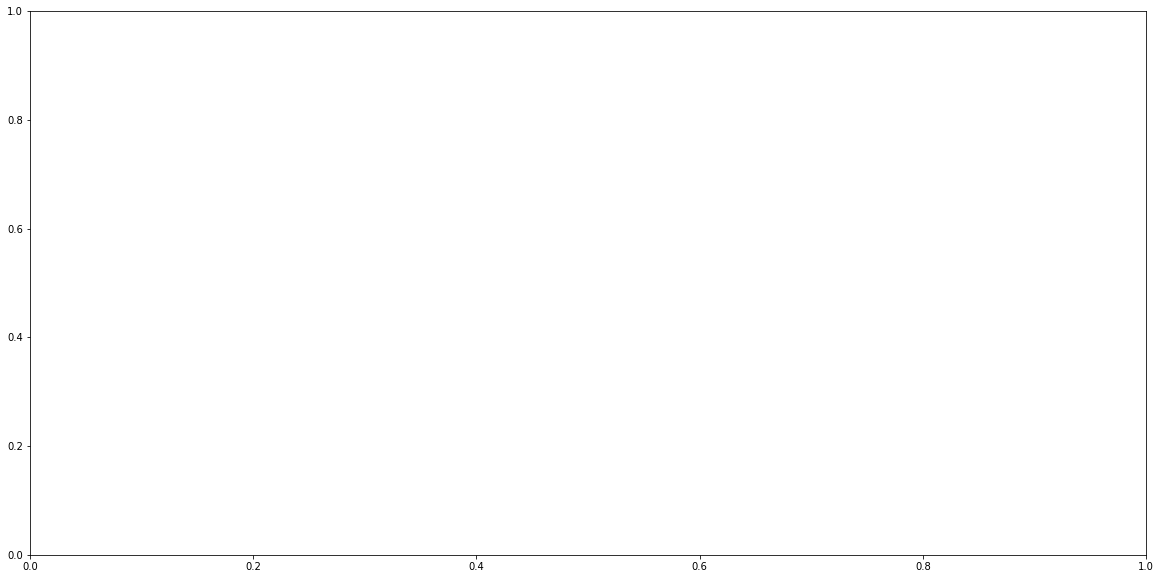

In [56]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({1:"blue", \
                                 2:"red", \
                                 3:"yellow", \
                                 4:"green", \
                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()

Exploratory Data Analysis
More on Word2Vec

In [101]:
word_bank = ["nook", "phone", "tv", "good", "price", "open", "social", "major", "free", "temporary", "good", "great", "mobile", "big", "ipad", "iphone", "apple",	"launch",	"get",	"today",	"austin",	"go",	"line", "store"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

nook: ['purse' 'curve' 'detection' 'iradar' 'cobra']
phone: ['mobilefarm' 'gadgetoverload' 'agnerd' 'cell' 'marketshare']
tv: ['bitrate' 'winelibrary' 'library' 'connected' 'xbox']
good: ['ridic' 'target' 'thoughtful' 'typing' 'eminent']
price: ['triple' 'foursquareuas' 'pork' 'dyac' 'revamped']
open: ['atx' 'downtown' 'powerhouse' 'scenes' 'sneaky']
social: ['circle' '______' 'facebook' 'rumour' 'googlecircles']
major: ['launching' 'possibly' 'seria' 'cierto' 'called']
free: ['edition' 'lonely' 'planet' 'lp' 'festival']
temporary: ['temp' 'shut' 'pop' 'poor' 'coincides']
good: ['ridic' 'target' 'thoughtful' 'typing' 'eminent']
great: ['blogged' 'alumni' 'custom' 'organize' 'museums']
mobile: ['updates' 'hootsuite' '4android' 'bb' 'mobileaeusers']
big: ['charlie' 'sheen' 'costume' 'goddess' 'preview']
ipad: ['ipad2' 'plunge' 'eye' 'fisting' 'hassle']
iphone: ['fully' 'handy' 'deshi80227' 'crash' 'fuckit']
apple: ['scout' 'pop' 'appleuas' 'powerhouse' 'aapl']
launch: ['rumor' 'heartbrea

t-SNE
Like PCA, the t-Distributed Stochastic Neighbor Embedding (t-SNE) is another dimensionality reduction technique that assists in visualizing high-dimensional datasets. To perceive the similarity between the related words in terms of spatial distance, t-SNE provided the coordinates of each word in a 2D scatterplot plane.

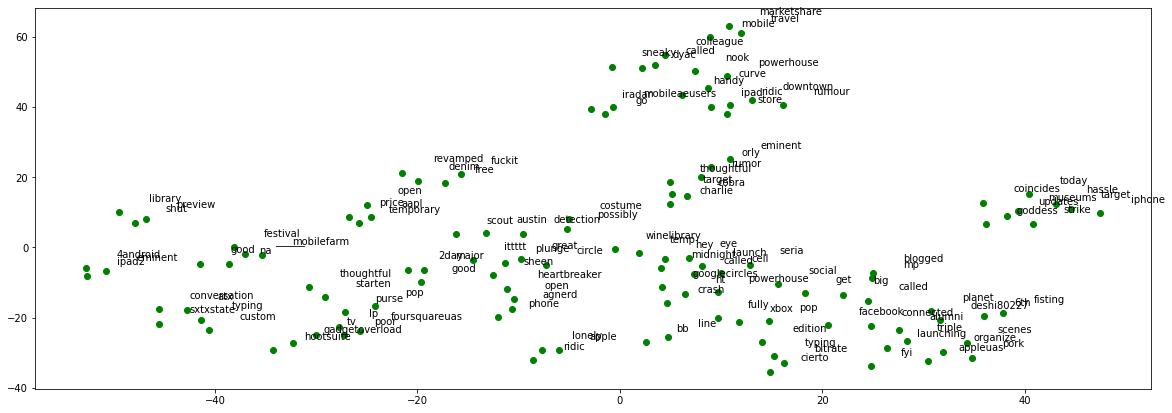

In [102]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y, color='green')

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

Word Algebra
Since Word2Vec characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores.

Iphone + Launch

In [103]:
word_vec.wv.most_similar(positive=["iphone", "launch"], \
                      negative=[], topn=1)

[('studio', 0.5486974716186523)]

Cheap - Quality

In [104]:
word_vec.wv.most_similar(positive=["great", "today"], \
                      negative=[], topn=1)

[('conversation', 0.5579875111579895)]

In [106]:
word_vec.wv.most_similar(positive=["cheap"], \
                      negative=["quality"], topn=1)

[('mapquest', 0.6366267800331116)]

In [105]:
word_vec.wv.most_similar(positive=["tablet"], \
                      negative=["phone"], topn=1)

[('rollout', 0.606801450252533)]

Machine Learning
We'll further process our finalized dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

Dealing with NaNs
It is important that we impute NaN values before we feed them into a model because machine learning algorithms can only work with real numbers. Our dataframe was derived from employing a Word2Vec model and so the only way we could have invalid entries that would become NaN values is when we have empty documents.

If a review contains no tokens then every dimension would become NaN. And so to find out the indices of NaN documents, we just have to filter reviews that have a NaN on the first dimension (or any dimension at all).

In [107]:
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[]


In [108]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

In [110]:
for blank in nan_list[0:5]:
    display(df["Product_Description"].iloc[blank])

In [111]:
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 6364
Final 'model_df' count: 6364


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.839855,1.100213,-0.477037,-0.841823,0.560164,0.291283,-0.308537,-0.075739,0.491014,0.860325,...,0.878169,-0.060509,-0.113013,0.098966,-0.517380,0.255419,-0.186769,-0.327373,0.113792,2
1,0.236325,0.748418,0.659483,-0.199862,1.616459,-0.504742,-0.097265,0.075119,0.187289,-0.281250,...,0.993229,0.020242,-0.049388,-0.439395,-0.756220,0.796305,-0.267024,-0.827681,-0.351479,2
2,0.550239,0.519399,0.328293,-0.191526,0.988262,-0.511454,0.573276,0.306002,0.071543,-0.583660,...,-0.208615,-0.021481,0.194902,0.650222,0.062729,0.127594,-0.251261,-0.653774,0.090572,2
3,0.438310,1.077701,0.748395,0.389481,0.391884,0.545518,-0.115499,0.520148,0.521555,0.279208,...,0.128910,0.241047,0.080355,0.340575,-0.541664,-0.272009,0.147631,0.092928,-0.514399,2
4,0.495540,0.483759,-0.451435,-0.048395,0.930184,-0.426699,-0.261864,0.435717,-0.321108,0.454620,...,0.382807,0.249457,0.179591,0.849330,-0.705489,0.939896,-0.319264,-0.049060,-0.273504,2


Dealing with Unbalanced Data
The distribution of ratings shows that, in general, users highly approve of products bought on Amazon. This however gives us a highly imbalanced dataset.

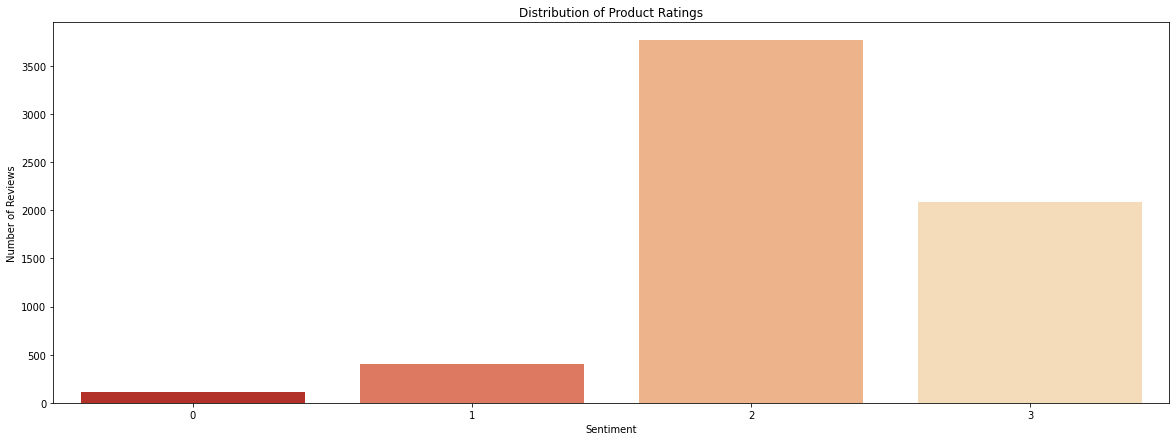

In [112]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["Sentiment"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Sentiment", ylabel="Number of Reviews")
plt.show()

In [113]:
majority = df["Sentiment"] == 3
majority_ratio = len(df[majority]) / len(df)

print(f"{majority_ratio*100:.2f}%")

32.83%


Underrepresentation vs. Overrepresentation
Performing over-representation is possible by bootstrapping the minority classes to match the size of the majority classes. This can be done using K-Nearest Neighbors (KNN) or via Support Vector Machine (SVM) by clustering a given class first before generating random samples within the decision boundaries of the class. A popular module called SMOTE, or Synthetic Minority Over-sampling Technique, does exactly this. However, since the imbalance in our classes is massive, and because we have 100 dimensions for each one of our almost 1.7 million observations, this approach is extremely computationally expensive.

Because our dataset is huge, we can afford to perform sampling in every class and still have a significant amount of data for the model. This way, we can then opt to underrepresent the majority class according to our most minority class.

In [114]:
count = len(model_df[model_df["label"] == 0])
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 111


In [115]:
#trim the majority class
condition = model_df["label"] == 3
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [0, 1, 2,]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [0, 1, 2, 3]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 0: 111
Size of Class 1: 111
Size of Class 2: 111
Size of Class 3: 111


In [116]:
trimmed_df = trimmed_df.sort_values(by="label")
display(trimmed_df.head())


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
6088,0.684745,0.754316,0.020615,0.253642,0.239779,0.021102,-0.318000,-0.595100,0.695717,0.524423,...,0.139625,-0.388929,-0.261986,-0.758376,-0.041261,-0.164290,0.797022,0.102770,-0.307855,0
5393,0.266318,0.402314,0.204998,-0.378302,0.604278,-0.059900,-0.134692,-0.397792,-0.143298,0.842461,...,0.221805,-0.286160,0.020427,0.034542,-0.636118,-0.320252,0.236016,0.058518,0.464133,0
5473,-0.031791,0.928178,0.383576,0.568999,1.130731,-0.213654,0.248436,0.642053,0.206817,-0.010612,...,-0.749586,0.170820,-0.157891,0.749743,-0.334284,0.042699,0.297537,-0.510239,-0.496940,0
1040,0.090789,0.686666,0.330900,0.207749,0.685907,-0.127288,-0.254661,0.084425,0.636032,-0.226093,...,0.096203,-0.204559,-0.177293,-0.110859,-0.541671,0.138792,0.524083,-0.250047,-0.396802,0
2188,0.705583,0.803947,0.079292,-0.073318,0.231891,0.118607,-0.299991,-0.246531,0.769814,0.218717,...,0.217580,-0.593048,-0.106286,-0.957106,0.268959,-0.003867,0.484999,-0.278989,-0.558231,0


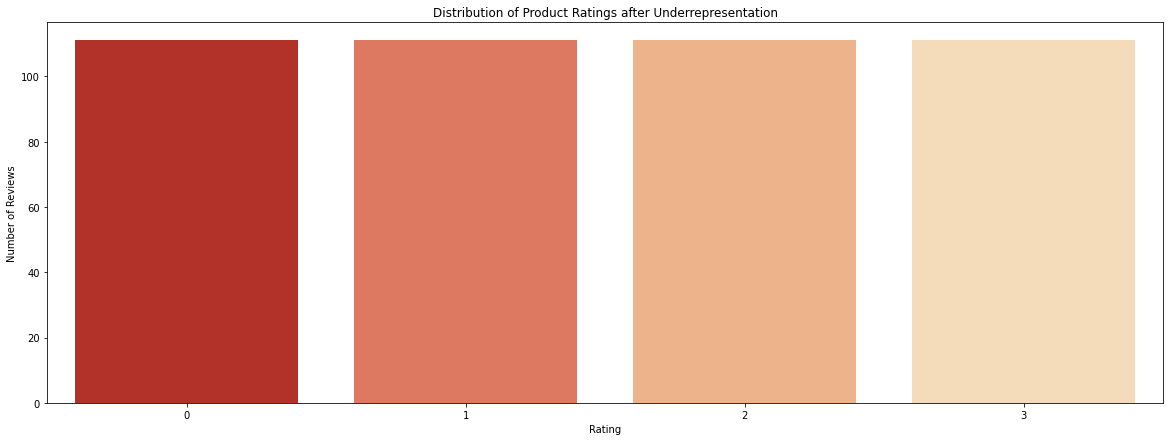

In [117]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

Train-Test Split
The y is our target variable or the labels for the data. The X constitutes the features and are the predictor variables.

We evenly split the training and testing sets and stratify to ensure the ratio of classes in both sets are identical.

In [118]:
from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

Scoring and Baseline
In our study, we will make use of two metrics to measure the model performance:

Accuracy
F1 Score
Accuracy will identify how many reviews are correctly labeled by the model. There are five ratings and thus five classes. No review can have two or more ratings and so the probability that a correct prediction is made from pure guesswork is 20%.

The F1 score is taking precision and recall into consideration. Taking into account false positives and false negatives for each class is especially important in inherently imbalanced datasets.

The baseline scores below are for when a model only randomly guesses the output labels – in this case, when every prediction is the same class. The scores are also based on an evenly distributed dataset.

In [120]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 3)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 24.775%
Baseline F1 Score: 0.248


Random Forest
Random Forest actually has a native way of supporting datasets that have class imbalance. We will therefore be able to use the original model_df instead of the sample trimmed_df:

In [121]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [122]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, class_weight={0:10, 1:7, 2:1, 3:9}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

CPU times: user 1.31 s, sys: 2 ms, total: 1.32 s
Wall time: 1.4 s


RandomForestClassifier(class_weight={0: 10, 1: 7, 2: 1, 3: 9},
                       criterion='entropy', n_estimators=25, random_state=42)

Our tuned Random Forest model got a very high score on the training data. The confusion matrix plotted below highlighted how the model almost perfectly classified each Amazon review accordingly.

However, these scores may be misleading since they are based on the data that the model were trained on. This is highly likely a result of overfitting. It is then important to rate our model more effectively without digging into our reserved test set.

In [123]:
y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 99.686%
Training Set F1 Score: 0.997


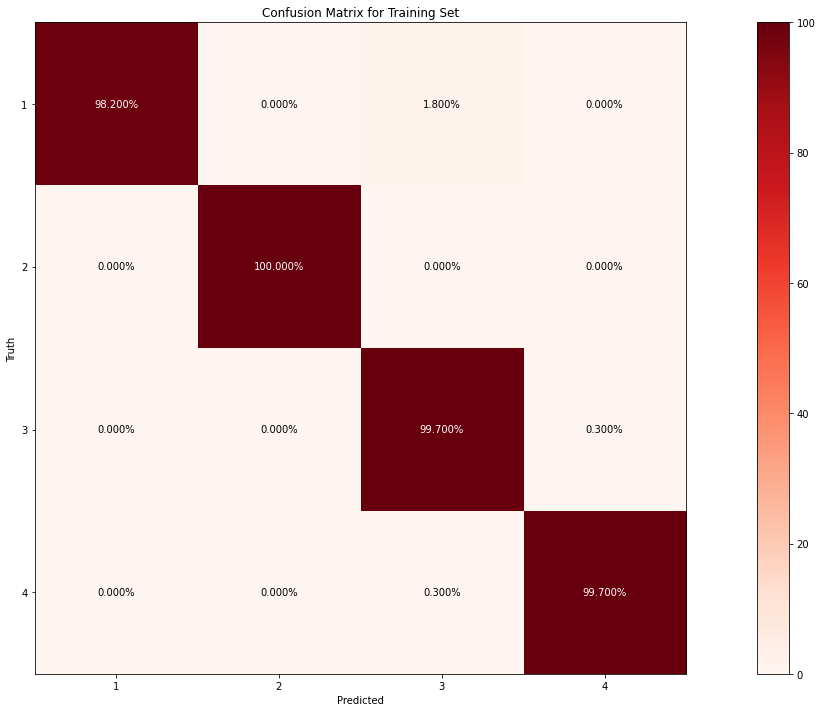

In [124]:
from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

Cross-Validation
Cross-validation makes the most of the training data by splitting the training set into folds and further subjecting each fold to train-test splits. Cross-validation can thus test against overfitting and the resulting scores can better reflect how the model performs on data it has not seen before.

In [125]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 61.314%
Training Set F1 Score: 0.613


Let's now try to create a model based on a popular boosting technique and see how it compares with our Random Forest model (which is a tree-based bagging approach). XGBoost has become a staple in Kaggle competitions because of its high rate of success and its ease-of-use.

The class notation for our XGBoost object boost begins from 0, and so we perform an element-wise shift of our labels from 1 to 0, from 2 to 1, from 3 to 2, etc. We tune our model using the maximum number of depths, the learning rate (eta), the number of classes, etc. We expect our outputs to be multi-class and so we select softprob as our objective.

In [144]:
%%time
import xgboost as xgb

y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 8, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 4}

boost = xgb.train(parameters, train_set, 100)

XGBoostError: ignored

In [142]:
X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [143]:
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")

NameError: ignored

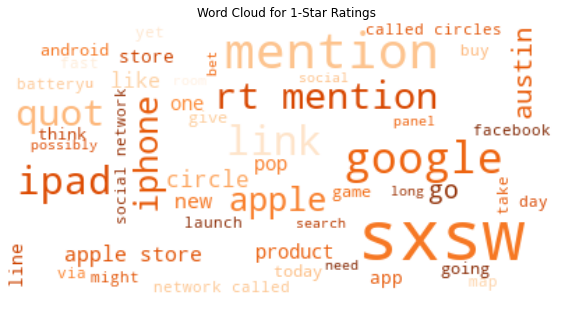

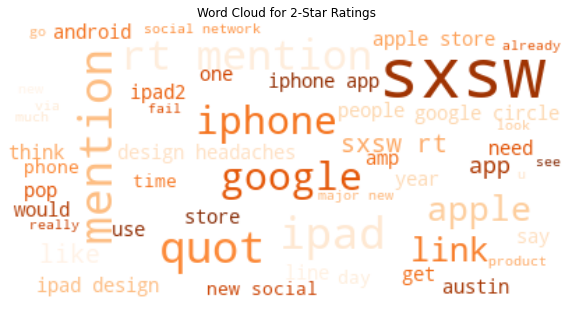

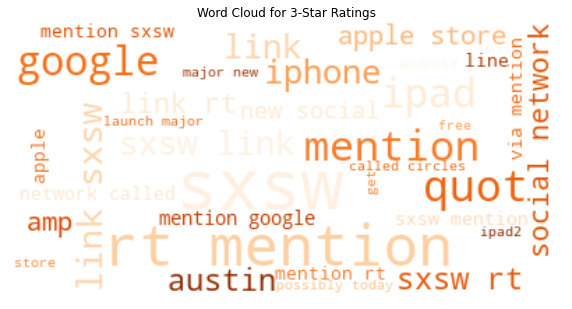

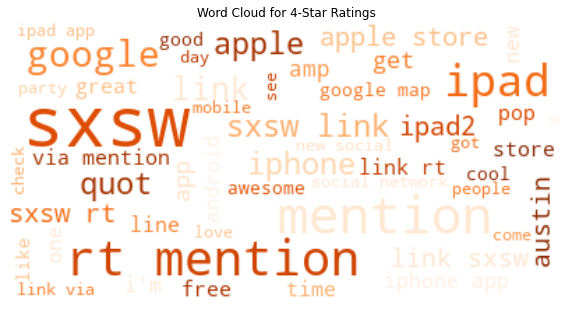

In [141]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["Sentiment"]==0]["Product_Description"].values).lower()
two_star_text = " ".join(df[df["Sentiment"]==1]["Product_Description"].values).lower()
three_star_text = " ".join(df[df["Sentiment"]==2]["Product_Description"].values).lower()
four_star_text = " ".join(df[df["Sentiment"]==3]["Product_Description"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()